In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Merged trades
merged_trades = '../data/processed/merged_trades'

In [73]:
# Load all the files
files = os.listdir(merged_trades)

# Storing prices and volumes
prices = None
volumes = None

# Storing mean prices and volumes
prices_per_stock = []
volumes_per_stock = []

for file in files:
    df_prices = pd.read_parquet(f'{merged_trades}/{file}/{file}_prices.parquet')
    df_volumes = pd.read_parquet(f'{merged_trades}/{file}/{file}_volumes.parquet')

    if prices is None:
        prices = df_prices.values
        volumes = df_volumes.values

    else:
        # Concat across columns
        prices = np.concatenate((prices, df_prices), axis=1)
        volumes = np.concatenate((volumes, df_volumes.values), axis=1)

    # Compute mean prices and volumes
    prices_per_stock.append(df_prices.values)
    volumes_per_stock.append(df_volumes.values)



# Explorative Analysis of Price and Volumes

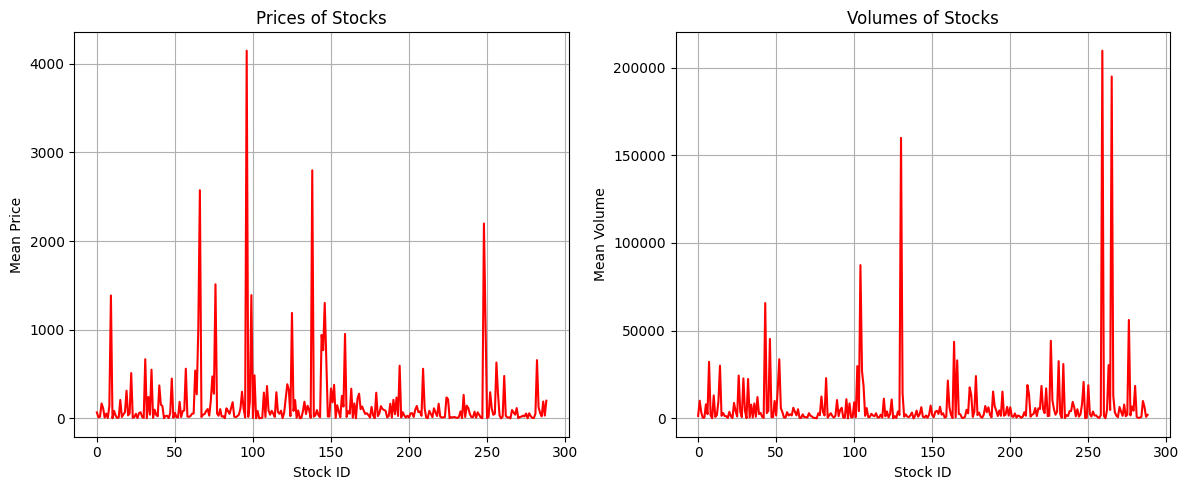

In [77]:
# Create figure
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Compute mean values
mean_prices = [np.mean(price_stock) for price_stock in prices_per_stock]
mean_volumes = [np.mean(volume_stock) for volume_stock in volumes_per_stock]

# Plotting prices
x = np.arange(len(mean_prices))
ax[0].plot(x, mean_prices, label='Mean', color='red')
ax[0].set_ylabel('Mean Price')
ax[0].set_title('Prices of Stocks')

ax[1].plot(x, mean_volumes, label='Mean', color='red')
ax[1].set_ylabel('Mean Volume')
ax[1].set_title('Volumes of Stocks')

# Add labels, grid and ylog
for a in ax:
    a.set_xlabel('Stock ID')
    a.grid()
    # a.set_yscale('log')
fig.tight_layout()

# Save figure
plt.savefig('../figures/prices_volumes.png', dpi=300, bbox_inches='tight')


# Explorative Analysis of Returns and Relative Volumes

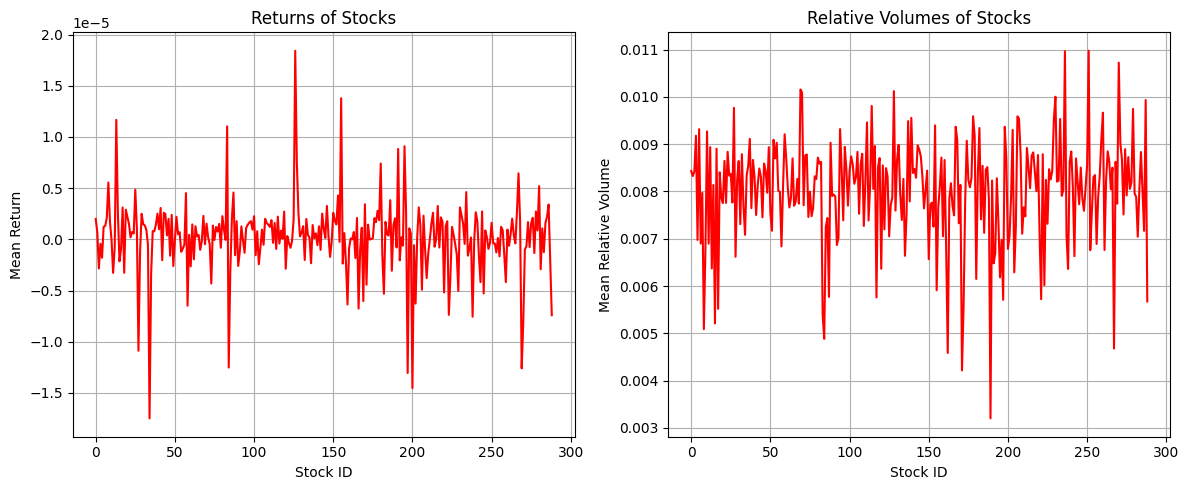

In [132]:
# Returns per stock
returns_per_stock = [price_stock[1:] / price_stock[:-1] - 1 for price_stock in prices_per_stock]
mean_returns = [np.mean(returns) for returns in returns_per_stock]

# Relative volume per stock
relative_volumes = [(volume_stock / np.cumsum(volume_stock, axis=0))[1:] for volume_stock in volumes_per_stock]
mean_relative_volumes = [np.mean(relative_volume) for relative_volume in relative_volumes]

# Create figure
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plotting prices
x = np.arange(len(mean_prices))
ax[0].plot(x, mean_returns, label='Mean', color='red')
ax[0].set_ylabel('Mean Return')
ax[0].set_title('Returns of Stocks')

ax[1].plot(x, mean_relative_volumes, label='Mean', color='red')
ax[1].set_ylabel('Mean Relative Volume')
ax[1].set_title('Relative Volumes of Stocks')

# Add labels, grid and ylog
for a in ax:
    a.set_xlabel('Stock ID')
    a.grid()
    # a.set_yscale('log')

fig.tight_layout()

# Save figure
plt.savefig('../figures/returns_relative_volumes.png', dpi=300, bbox_inches='tight')



In [150]:
def statistics(arr):
    return np.mean(arr, axis=1), np.median(arr, axis=1), np.max(arr, axis=1), np.min(arr, axis=1), np.std(arr, axis=1)

def plot_statistics(mean, median, max_vals, min_vals, std, ax):
    x = np.arange(len(mean))
    ax.plot(x, max_vals, label='Max', color='red')
    ax.plot(x, min_vals, label='Min', color='blue')
    ax.plot(x, std, label='St. Deviation', color='orange')
    ax.plot(x, mean, label='Mean', color='black')
    ax.plot(x, median, label='Median', color='green')
    ax.legend()

    # Creating the ticks
    xtick = np.arange(0, len(mean), 60)
    xtick_labels = [f'{8+i}:00' for i in range(len(xtick))]

    # Add the last tick
    xtick = np.append(xtick, len(mean))
    xtick_labels.append('Closing Auction')

    ax.set_xticks(xtick, xtick_labels, rotation=45)
    ax.set_xlabel('Time')
    ax.grid()



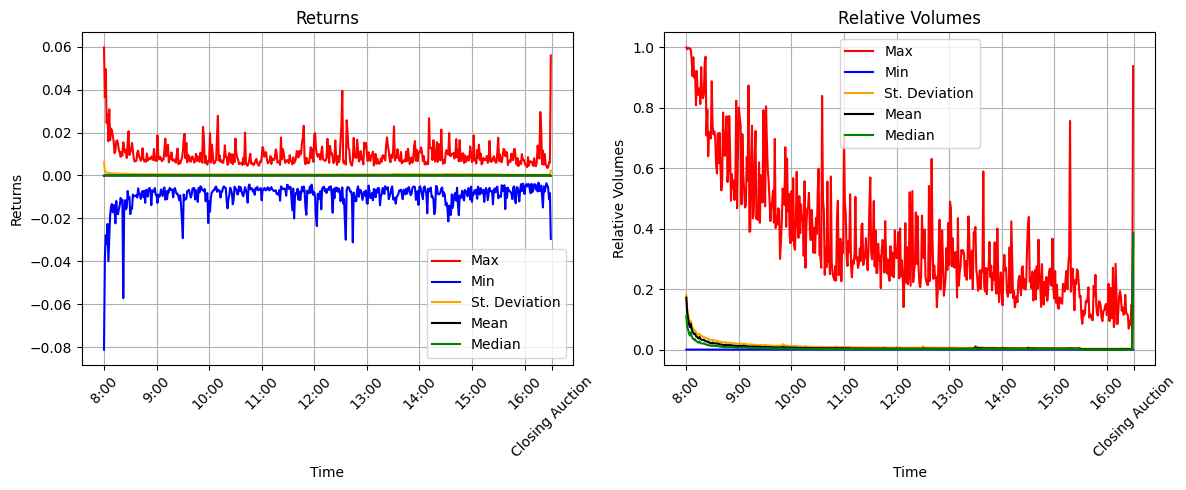

In [151]:
# Concatenate all returns
all_returns = np.concatenate(returns_per_stock, axis=1)
all_volumes = np.concatenate(relative_volumes, axis=1)

# Create figure
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Returns
stats = statistics(all_returns)
plot_statistics(*stats, ax[0])

# Volumes
stats = statistics(all_volumes)
plot_statistics(*stats, ax[1])

# Add title and ylabels
ax[0].set_title('Returns')
ax[0].set_ylabel('Returns')

ax[1].set_title('Relative Volumes')
ax[1].set_ylabel('Relative Volumes')

fig.tight_layout()

# Save figure
plt.savefig('../figures/returns_volumes.png', dpi=300, bbox_inches='tight')


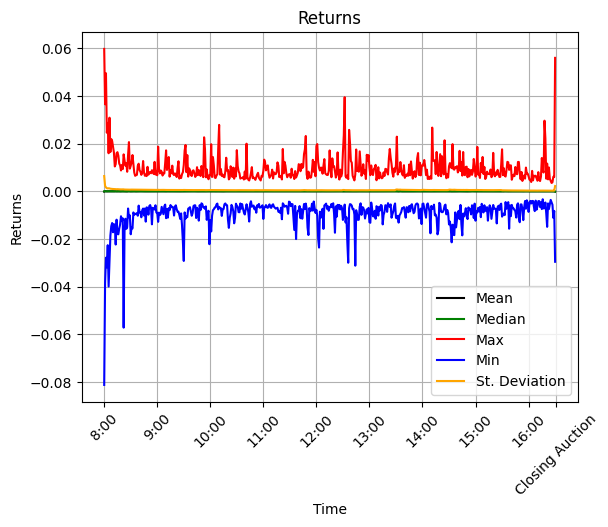

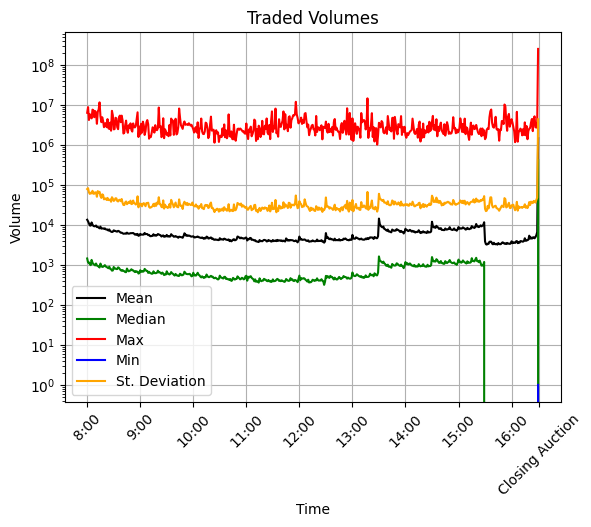

In [27]:
# Plotting as lines
x = np.arange(len(mean_volume))
plt.plot(x, mean_volume, label='Mean', color='black')
plt.plot(x, median_volume, label='Median', color='green')
plt.plot(x, max_vals_volume, label='Max', color='red')
plt.plot(x, min_vals_volume, label='Min', color='blue')
plt.plot(x, std_volume, label='St. Deviation', color='orange')
plt.legend()

# Creating the ticks
xtick = np.arange(0, len(mean_volume), 60)
xtick_labels = [f'{8+i}:00' for i in range(len(xtick))]

# Add the last tick
xtick = np.append(xtick, len(mean_volume))
xtick_labels.append('Closing Auction')

plt.xticks(xtick, xtick_labels, rotation=45)
plt.xlabel('Time')
plt.ylabel('Volume')
plt.title('Traded Volumes')
plt.grid()
# As log
plt.yscale('log')
plt.savefig('../figures/volumes.png', dpi=300, bbox_inches='tight')


In [22]:
arr_volumes[450]

array([2391.,    0.,    0., ..., 1723.,    0.,    0.], shape=(60977,))

In [7]:
df_volumes

,0,1,2,3,4,5,6,7,8,9,...,242,243,244,245,246,247,248,249,250,251
0,19716.0,13271.0,8835.0,45458.0,20559.0,54730.0,8820.0,15507.0,48717.0,20333.0,...,26123.0,12033.0,5863.0,12349.0,21647.0,35133.0,17030.0,17537.0,21691.0,106359.0
1,10670.0,1572.0,26744.0,18690.0,1853.0,7239.0,19863.0,2280.0,35408.0,4983.0,...,10327.0,4761.0,4180.0,2408.0,11758.0,2938.0,5266.0,3562.0,28461.0,67174.0
2,2426.0,792.0,1306.0,52458.0,3033.0,6791.0,9450.0,1931.0,56025.0,2396.0,...,8919.0,20882.0,2516.0,2700.0,3494.0,3993.0,1930.0,1559.0,3616.0,96976.0
3,1340.0,839.0,1113.0,7931.0,826.0,3417.0,16704.0,3126.0,18000.0,7510.0,...,2736.0,31410.0,854.0,1700.0,1068.0,851.0,2682.0,60.0,8353.0,61314.0
4,7589.0,1395.0,4710.0,11855.0,996.0,3901.0,8683.0,6238.0,19199.0,2450.0,...,1410.0,7353.0,1564.0,3282.0,170.0,5178.0,3986.0,4301.0,3866.0,107028.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
508,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
509,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
510,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
